# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [2]:
def covert_to_lower(df,columns):
    for i in range(len(columns)):
        df[columns[i]]=  df[columns[i]].str.lower()
        

def rename_drop_cols(df):
    cols_to_delete = []
    cols_to_rename_from = []
    cols_to_rename_to = []
    for i in df.columns:
        if '_y' in i:
            cols_to_delete.append(i)
        if '_x' in i:
            cols_to_rename_from.append(i)
            cols_to_rename_to.append(i.split('_x')[0])
    
    for i in range(len(cols_to_delete)):
        del df[cols_to_delete[i]]
    df.rename(columns=dict(zip(cols_to_rename_from, cols_to_rename_to)), inplace=True)



def splitdata(df,col,new_col,delimeter,position):
    df[new_col]= df[col].apply(lambda x: x.split(delimeter)[int(position)] if x.find(delimeter)!=-1 else x )


def setdefaultmissingvalues(df) :
    for cols in df.columns:
        if df[cols].dtype == 'float64':
            df[cols] = df[cols].fillna(0.0)
        elif df[cols].dtype == 'O':
            df[cols] = df[cols].fillna('_MISSING_')
        elif df[cols].dtype == 'datetime64[ns]':
            df[cols] = df[cols].ffill()

def plotdata(dataframe):
    missing_data = dataframe.isnull().sum()
    df = pd.DataFrame({'name':missing_data.index, 'count':missing_data.values})

    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'name', y = 'count', data=df,hue=df['count'])
    plt.xticks(rotation = 90)
    plt.show()

#check percentage of missing data in uom space dataset
    for col in dataframe.columns:
        pct_missing = np.mean(dataframe[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [3]:
# loading data
uom_space_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/uom-space.xlsx')
rm_category_type_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/rm-category-type-py-compatible.xlsx')
em_location_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/em-location.xlsx')
av_equipment_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/av-equipment.xlsx')
timetable_2020_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/2020-timetable-v2.xlsx')


In [4]:
covert_to_lower(uom_space_df,['Campus Code','Building Name','Room Code','Room Type Abbreviation','Department Code','Room Location Code'])
covert_to_lower(rm_category_type_df,['Room Type Abbreviation','Description','Room Type Definition'])
covert_to_lower(em_location_df,['Room Code'])
covert_to_lower(timetable_2020_df,['Name of Department','Name of Module','Description of Module','Name','Scheduled Start as day name'
                                  ,'Name of Allocated Locations','Name of Zone of Allocated Locations','Host Key of Allocated Locations',
                                  'Name of Department of Allocated Locations','Name of Type'])
covert_to_lower(av_equipment_df,['Equipment Code','Equipment Standard','Manufacturer','Equip. Status','Room Code','Campus Code','Room Type Abbreviation'])

In [5]:
uom_space_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code
0,par,101,beaurepaire centre,0,cg01,NaN,6,631,circ-department,0.0,80.62,NaN,8490,par;101;0;cg01
1,par,101,beaurepaire centre,0,cg02,NaN,8,805,circulation,0.0,12.00,NaN,unigen,par;101;0;cg02
2,par,101,beaurepaire centre,0,cg03,NaN,6,631,circ-department,0.0,14.12,NaN,8490,par;101;0;cg03
3,par,101,beaurepaire centre,0,cg04,NaN,8,805,circulation,0.0,11.01,NaN,unigen,par;101;0;cg04
4,par,101,beaurepaire centre,0,g02,NaN,6,623,waiting/foyer,0.0,57.35,NaN,8490,par;101;0;g02


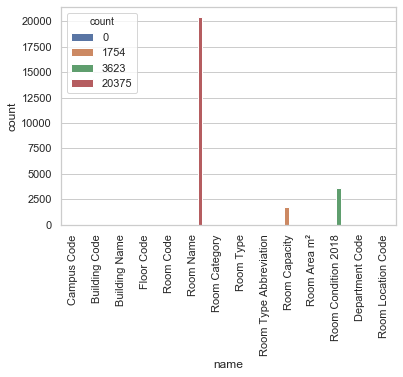

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 92.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 8.0%
Room Area m² - 0.0%
Room Condition 2018 - 16.0%
Department Code - 0.0%
Room Location Code - 0.0%


In [6]:
plotdata(uom_space_df)

In [7]:
#replace missing values for Room Name,Room condition, Room capacity, putting default value as 0 for room capacity and 'Missing' for Room condition and room name.
# Excluding the data like room name which has over 90% missing value will make the result skewed or less accurate.
# discuss with other team members on their take on this.

setdefaultmissingvalues(uom_space_df)

In [8]:
# clean room category data
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,office - other,office - other ...,"to be used, as the last resort, for any ""offic..."
1,1,101,office academic,office - academic staff ...,a room with office furniture which provides ac...
2,1,102,office research,office - research staff ...,a room with office furniture which provides ac...
3,1,103,office grad res,office - graduate researcher ...,a room with office furniture which provides ac...
4,1,104,off-tech,office - technical/laboratory/store staff ...,a room with office furniture which provides ac...


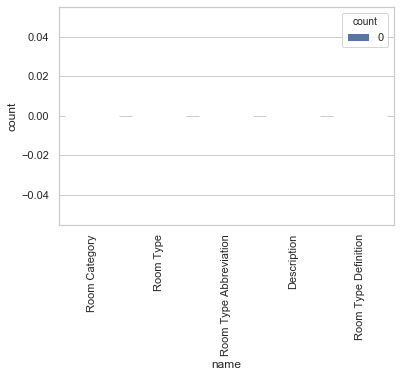

Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [9]:
plotdata(rm_category_type_df)
# since the room type data is clear, no need to clean the data. Since we need to join the data for analysis purpose. 
# We check for the missing data on the join between room category and the uom space datasets.

In [10]:
#converting the data type of Room Category and merging the data type
uom_space_df['Room Type'] = uom_space_df['Room Type'].astype('str').str.strip()
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()
joined_uom_space_df = pd.merge(uom_space_df,rm_category_type_df,on=['Room Type'],how='left')
joined_uom_space_df.shape


(22166, 18)

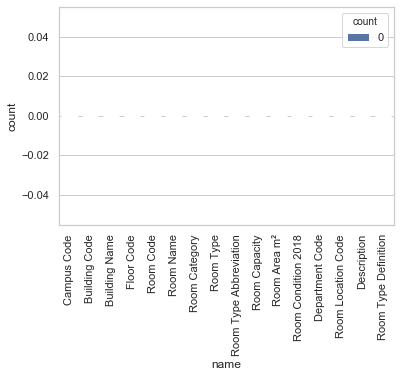

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 0.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 0.0%
Room Area m² - 0.0%
Room Condition 2018 - 0.0%
Department Code - 0.0%
Room Location Code - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [11]:
rename_drop_cols(joined_uom_space_df)
plotdata(joined_uom_space_df)

In [15]:
em_location_df.head()

,Employee Sequential ID,Building Code,Floor Code,Room Code,Generic Room Code
0,1,102,4.0,438.01,438
1,2,102,0.0,g21.01,g21
2,3,102,3.0,332.01,332
3,4,102,3.0,333.03,333
4,5,102,0.1,b08f,b08f


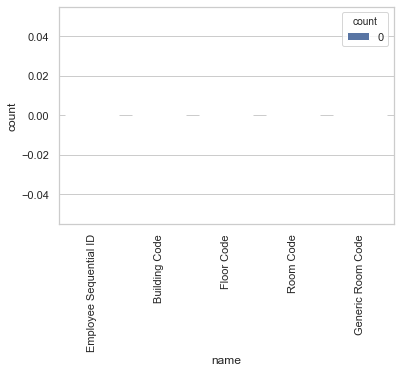

Employee Sequential ID - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Generic Room Code - 0.0%


In [21]:
plotdata(em_location_df)

In [14]:
splitdata(em_location_df,'Room Code','Generic Room Code','.',0)
rename_drop_cols(em_location_df)

In [18]:
av_equipment_df.head()
#Does 0.1 floor code means basement floor?


,Equipment Code,Equipment Standard,Manufacturer,Equip. Status,Building Code,Floor Code,Room Code,Campus Code,Room Type,Room Type Abbreviation,Room Category
0,b122-r2-a18,mic wl handheld,sennheiser,in service,379,0.1,b131,par,217,collaborative,2
1,b122-r2-a20,wl pres system,extron,in service,379,0.1,b131,par,217,collaborative,2
2,b122-r2-b07,control system,extron,in service,379,0.1,b117,par,308,stud comp-teach,3
3,b122-r2-b08,wl pres system,extron,in service,379,0.1,b117,par,308,stud comp-teach,3
4,b122-r2-e22,wl pres system,extron,in service,379,0.1,b116,par,308,stud comp-teach,3


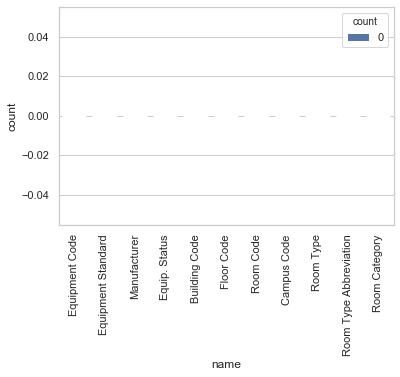

Equipment Code - 0.0%
Equipment Standard - 0.0%
Manufacturer - 0.0%
Equip. Status - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Campus Code - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Category - 0.0%


In [19]:
plotdata(av_equipment_df)

In [22]:
# delete useless columns from the df.
del timetable_2020_df['Name of Children']
del timetable_2020_df['Name of Allocated Locations of Children']
del timetable_2020_df['Scheduled?']
del timetable_2020_df['Booking?']
timetable_2020_df.head()

,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type
0,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-06,12.0,seminar
1,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-13,12.0,seminar
2,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-20,12.0,seminar
3,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-03-27,12.0,seminar
4,166.0,arts - social & politic sci,soci30013/u/1/sm1,survey design and analysis,soci30013/u/1/sm1/s01/02,24.0,friday,09:00:00,12:00:00,03:00:00,par-john medley-wg09 (ssps research hub),pr - professors walk,191-wg09,arts - social & politic sci,24.0,10.0,2020-04-03,12.0,seminar


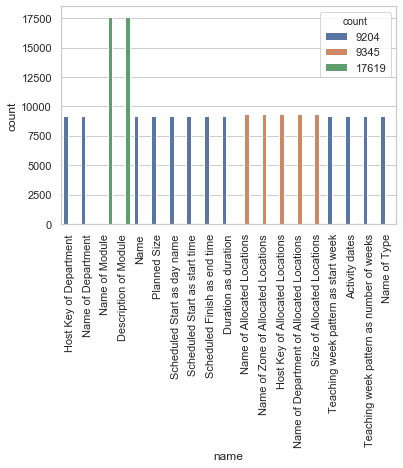

Host Key of Department - 7.0%
Name of Department - 7.0%
Name of Module - 13.0%
Description of Module - 13.0%
Name - 7.0%
Planned Size - 7.0%
Scheduled Start as day name - 7.0%
Scheduled Start as start time - 7.0%
Scheduled Finish as end time - 7.0%
Duration as duration - 7.0%
Name of Allocated Locations - 7.0%
Name of Zone of Allocated Locations - 7.0%
Host Key of Allocated Locations - 7.0%
Name of Department of Allocated Locations - 7.0%
Size of Allocated Locations - 7.0%
Teaching week pattern as start week - 7.0%
Activity dates - 7.0%
Teaching week pattern as number of weeks - 7.0%
Name of Type - 7.0%


In [23]:
plotdata(timetable_2020_df)

In [24]:
#inserting default values into the missing columns. Since this data will be used for predicting the use of toilets depending upon the class times.
# We cannot afford to loose that data. # what is the impact of removing null data (9204) from timetable dataset(131857)
setdefaultmissingvalues(timetable_2020_df)